In [5]:
# import libraries

import pandas as pd
import requests
from datetime import timedelta, datetime
import matplotlib.pyplot as plt
import seaborn as sns

#import data set

from vega_datasets import data
from io import StringIO
from acquire import items_, stores_, sales_, merge_dataframes, pull_csv
from prepare import prep_store, prep_csv, plot_variables

### Convert date column to datetime format.

In [6]:
df = merge_dataframes()

In [7]:
df.head(2)

,item_id,item_brand,item_name,item_price,sale_amount,sale_date,sale_id,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,store_id
0,1,Riceland,Riceland American Jazmine Rice,0.84,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1
1,1,Riceland,Riceland American Jazmine Rice,0.84,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1


In [8]:
df.sale_date = pd.to_datetime(df.sale_date)
df = df.set_index('sale_date').sort_index()
df.index = df.index.tz_localize(None)

In [9]:
df.head()

,item_id,item_brand,item_name,item_price,sale_amount,sale_id,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,store_id
sale_date,,,,,,,,,,,,,
2013-01-01,1,Riceland,Riceland American Jazmine Rice,0.84,13.0,1,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1
2013-01-01,17,Ducal,Ducal Refried Red Beans,1.16,26.0,295813,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,TX,78201,3
2013-01-01,7,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,32.0,125995,70177154004,70177154004,8503 NW Military Hwy,San Antonio,TX,78231,10
2013-01-01,18,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,45.0,314073,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,TX,78201,3
2013-01-01,19,Careone,Careone Family Comb Set - 8 Ct,0.74,34.0,332333,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,TX,78201,3


### Plot the distribution of sale_amount and item_price.

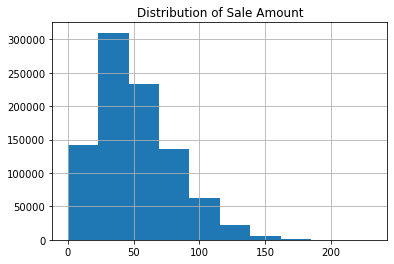

In [10]:
df['sale_amount'].hist()
plt.title('Distribution of Sale Amount')
plt.show()

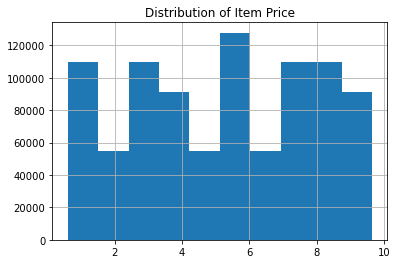

In [11]:
df['item_price'].hist()
plt.title('Distribution of Item Price')
plt.show()

### Set the index to be the datetime variable.

already completed in question 1

-----

### Add a 'month' and 'day of week' column to your dataframe.

In [12]:
df['day'] = df.index.day_name()

In [13]:
df['month'] = df.index.month_name()

In [14]:
df.head(1)

,item_id,item_brand,item_name,item_price,sale_amount,sale_id,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,store_id,day,month
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,Riceland,Riceland American Jazmine Rice,0.84,13.0,1,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,January


### Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [15]:
df['sales_total'] = df.item_price * df.sale_amount

In [16]:
df.head(1)

,item_id,item_brand,item_name,item_price,sale_amount,sale_id,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,store_id,day,month,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,Riceland,Riceland American Jazmine Rice,0.84,13.0,1,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,1,Tuesday,January,10.92


-------------

### Import German CSV & Prep

In [2]:
df = prep_csv()

In [3]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006
2006-01-04,1457.217,0.0,0.0,0.0,January,2006
2006-01-05,1477.131,0.0,0.0,0.0,January,2006


/Users/davidberchelmann/codeup-data-science/time-series-exercises/prepare.py:48: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax, bins = 8)


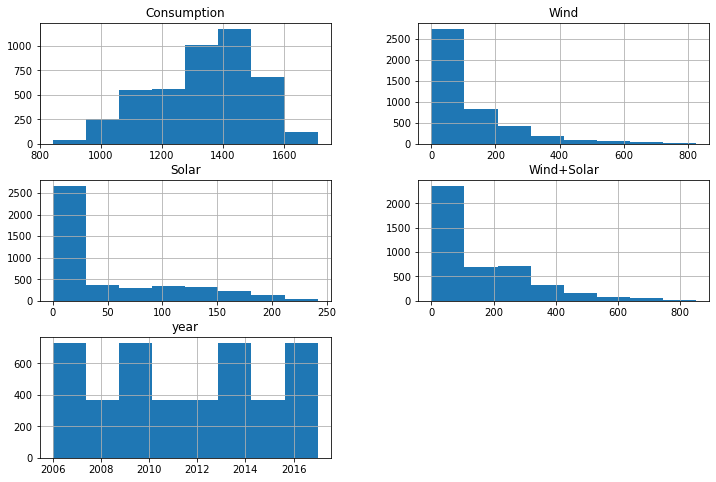

In [4]:
plot_variables()